# Classification 예제
본 예제에서는 sklearn.datasets에서 Iris dataset을 불러와서  
아래 이미지와 같이 Iris dataset의 경우 총 3개의 클래스('setosa', 'versicolor', 'virginica')가 있으며 각 클래스 당 50개의 샘플이 있습니다. 각 샘플은 4개의 속성('sepal length', 'sepal width', 'petal length', 'petal width')을 가집니다. 

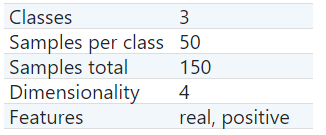

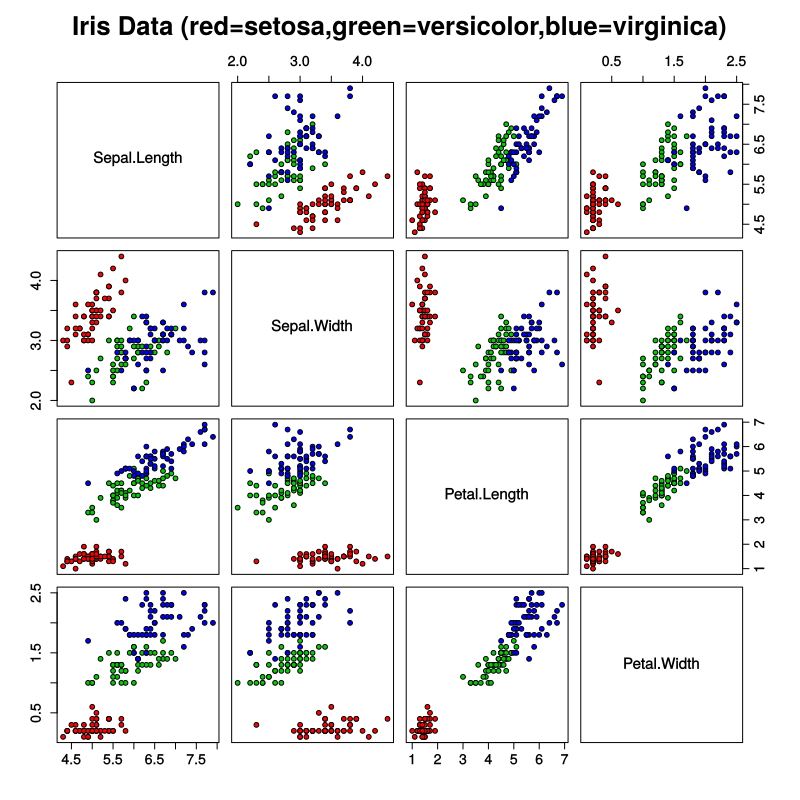

# 준비: Import dependencies
본 예제에서는 sklearn(scikit-learn), numpy, torch, matplotlib 을 이용합니다.

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# DNN 모델 선언
3개의 Fully Connected layer를 사용하며, activation function으로는 ReLU 함수, 마지막에 softmax 함수를 이용하여 각 클래스에 대한 확률을 계산합니다.

In [15]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(4, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x

# 데이터 나누기
1. Iris 데이터를 불러와서 train data와 test data로 50:50으로 나눕니다.

In [16]:
iris = load_iris()
train_x, test_x, train_y, test_y = train_test_split(iris.data, iris.target, test_size=0.5)

train_x = torch.Tensor(train_x).float()
test_x = torch.Tensor(test_x).float()
train_y = torch.Tensor(train_y).long()
test_y = torch.Tensor(test_y).long()

print("train_x.shape =", train_x.shape)
print("test_x.shape =", test_x.shape)
print("train_y.shape =", train_y.shape)
print("test_y.shape =", test_y.shape)

train_x.shape = torch.Size([75, 4])
test_x.shape = torch.Size([75, 4])
train_y.shape = torch.Size([75])
test_y.shape = torch.Size([75])


# Training
이전에 선언한 모델의 인스턴스를 생성하고, loss 함수로는 CrossEntropyLoss, optimizer는 SGD 계열의 Adam optimizer를 사용합니다. 100 epoch 동안 학습을 진행하며, 5 epoch 마다 loss 및 accuracy를 출력합니다. 75개의 샘플 데이터에 대해서 학습을 진행합니다.

In [17]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

for epoch in range(100):
    prediction = model(train_x)
    loss = criterion(prediction, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0:
        _, pred_y = torch.max(prediction,1) # one-hot vector로부터 class의 index를 추출
        accuracy = (pred_y == train_y).sum().item() / train_y.shape[0] # accuracy 측정
        print("epoch {}: Loss={:.6f}, Accuracy={:.2f}".format(epoch, loss.item(), accuracy))

epoch 0: Loss=1.088320, Accuracy=0.37
epoch 5: Loss=0.811497, Accuracy=0.72
epoch 10: Loss=0.702587, Accuracy=0.89
epoch 15: Loss=0.640661, Accuracy=0.92
epoch 20: Loss=0.600489, Accuracy=0.97
epoch 25: Loss=0.590035, Accuracy=1.00
epoch 30: Loss=0.575139, Accuracy=0.99
epoch 35: Loss=0.570755, Accuracy=0.99
epoch 40: Loss=0.567091, Accuracy=1.00
epoch 45: Loss=0.563280, Accuracy=1.00
epoch 50: Loss=0.560689, Accuracy=1.00
epoch 55: Loss=0.558844, Accuracy=1.00
epoch 60: Loss=0.557572, Accuracy=1.00
epoch 65: Loss=0.556635, Accuracy=1.00
epoch 70: Loss=0.555810, Accuracy=1.00
epoch 75: Loss=0.555137, Accuracy=1.00
epoch 80: Loss=0.554632, Accuracy=1.00
epoch 85: Loss=0.554190, Accuracy=1.00
epoch 90: Loss=0.553848, Accuracy=1.00
epoch 95: Loss=0.553552, Accuracy=1.00


# 테스트


In [18]:
model.eval()
test_pred = model(test_x)
loss = criterion(test_pred, test_y)
_, pred_y = torch.max(test_pred, 1)
accuracy = (pred_y == test_y).sum().item() / test_y.shape[0]
print("Test: Loss={:.6f}, Accuracy={:.2f}".format(loss.item(), accuracy))

Test: Loss=0.583323, Accuracy=0.96


# 수고하셨습니다.